In [62]:
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [81]:
#Input Definition
experi_num = 12

#Input Refinement
log_path = '/opt/ml/code/WRAITH/level1-image-classification-level1-cv-06/KTH/model/exp'+str(experi_num)+'/log.txt'
log = open(log_path)
f = log.readlines()

In [82]:
Maximum_training_acc = [0.0 for _ in range(10)]
Validation_acc = [0.0 for _ in range(10)]
val_idx = 0
for i in range(len(f)):
    if f[i][1:4] == "Val":
        tgt = f[i].split(' : ')
        Validation_acc[val_idx] = float(tgt[1][:5])
        val_idx += 1
    elif f[i][0:5] == "Epoch":
        train_idx = int(f[i][6])
        Maximum_training_acc[train_idx] = max(Maximum_training_acc[train_idx],float(f[i][-19:-14]))

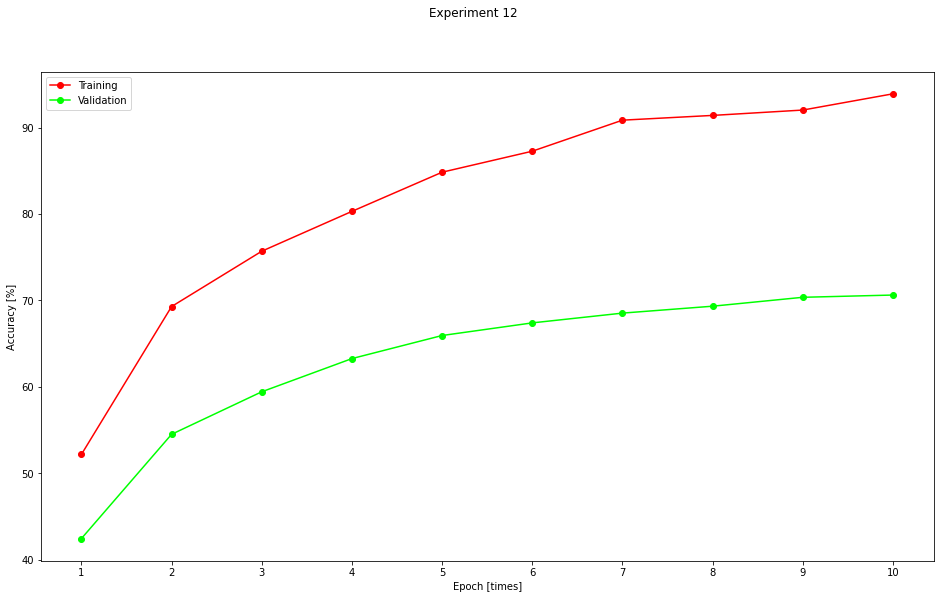

In [83]:
fig, ax = plt.subplots(1,1,figsize=(16,9),sharey=True)
ax.plot(np.arange(1,11), Maximum_training_acc, c='#FF0000', label='Training', marker='o')
ax.plot(np.arange(1,11), Validation_acc, c='#00FF00', label='Validation', marker='o')
ax.set_xlabel('Epoch [times]')
ax.set_xticks(np.arange(1,11))
ax.set_ylabel('Accuracy [%]')
ax.legend()
fig.suptitle('Experiment '+str(experi_num))
plt.show()